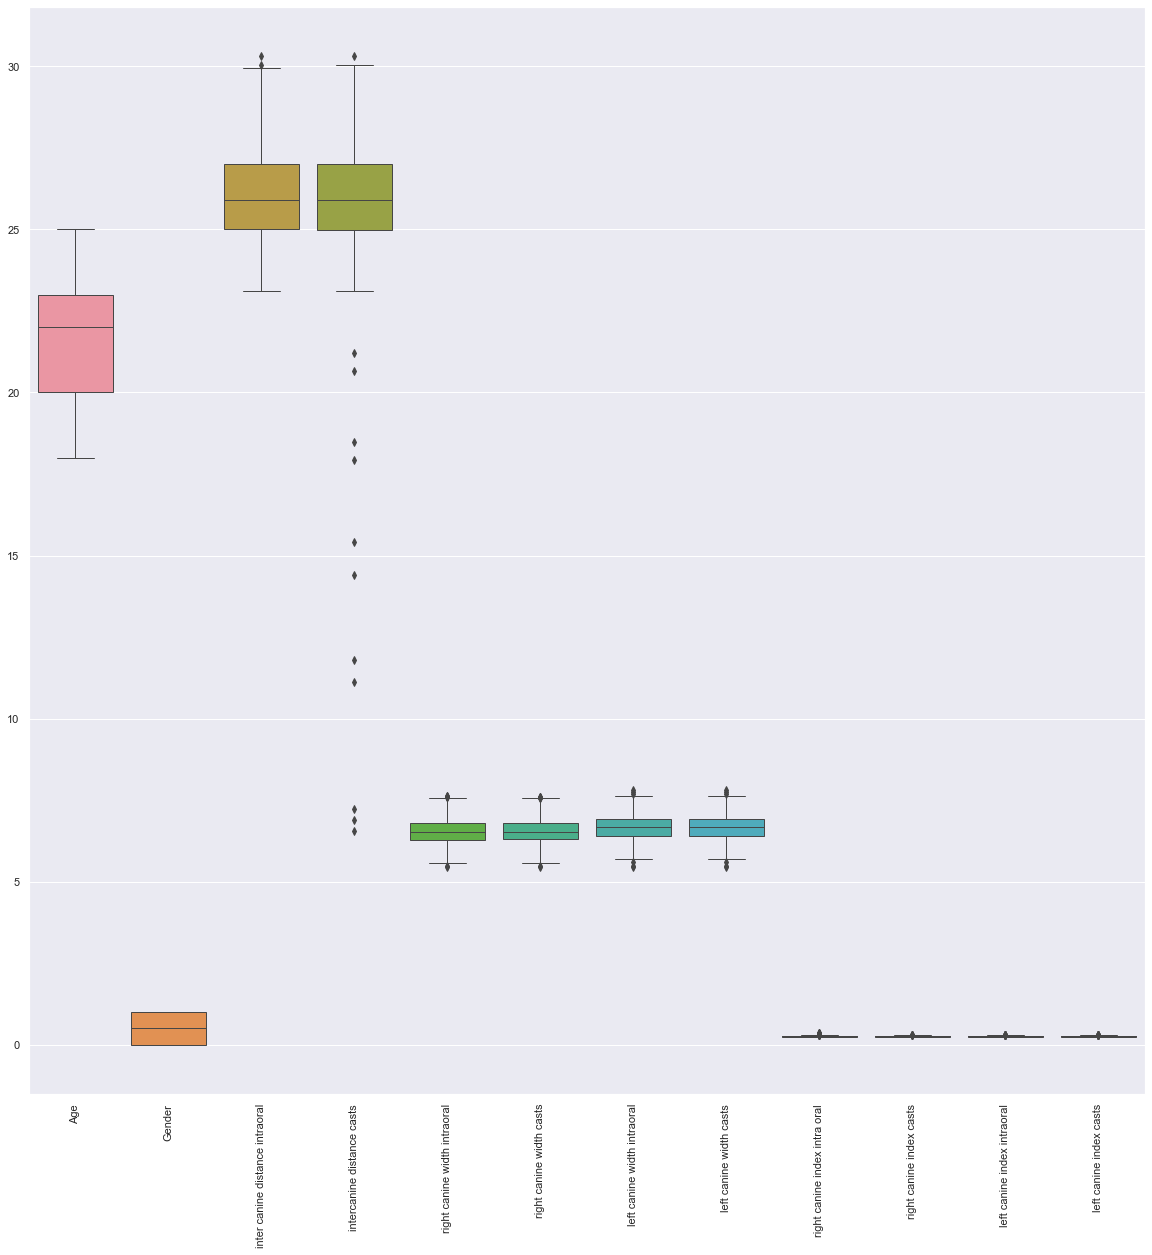

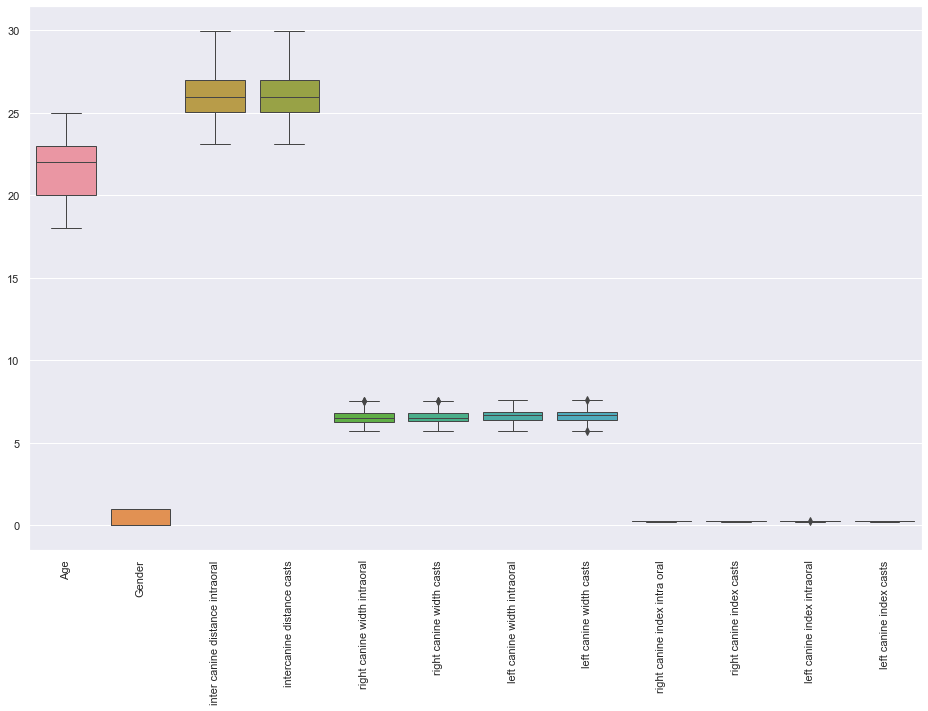

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
df = pd.read_csv(r"C:\Users\akshita\Downloads\Proj1 (1).csv")

list(df)

df.isnull().sum()
df.drop(labels='Sample ID', axis=1, inplace = True)
df.drop(labels='Sl No', axis=1, inplace = True)

list(df)

#lebel Encoding
from sklearn.preprocessing import LabelEncoder 
label_encoder  = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])


fig = plt.figure(figsize =(20, 20))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()


def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

df.shape

index_list = []
for feature in [
 'Age',
 'Gender',
 'inter canine distance intraoral',
 'intercanine distance casts',
 'right canine width intraoral',
 'right canine width casts',
 'left canine width intraoral',
 'left canine width casts',
 'right canine index intra oral',
 'right canine index casts',
 'left canine index intraoral',
 'left canine index casts']:
    index_list.extend(outliers(df , feature))

df1 = remove(df,index_list)

df1.shape

fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()